In [1]:
import datacube
dc = datacube.Datacube(config='/home/654/brl654/groupspace/datacube/simoncube.conf')

/g/data/v10/public/modules/agdc-py3-env/20170525/envs/agdc/lib/python3.6/site-packages/xarray/core/formatting.py:16: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


In [2]:
%matplotlib inline

# Find and inspect one layer

In [3]:
ds = dc.find_datasets(product='s1_gamma0_scene')[3] # grab metadata record concerning an example dataset/layer
ds.center_time # find what time it corresponds to

datetime.datetime(2017, 4, 15, 19, 51, 53, 566905)

In [4]:
lon = 145.5895, 146.0649
lat = -17.53, -16.7007
x = dc.load(product='s1_gamma0_scene', lat=lat, lon=lon, time=ds.center_time, output_crs='epsg:3577', resolution=(-25,25)) # load that one layer
x

<xarray.Dataset>
Dimensions:  (time: 1, x: 2413, y: 3861)
Coordinates:
  * time     (time) datetime64[ns] 2017-04-15T19:51:53.566905
  * y        (y) float64 -1.856e+06 -1.856e+06 -1.856e+06 -1.856e+06 ...
  * x        (x) float64 1.442e+06 1.442e+06 1.442e+06 1.442e+06 1.442e+06 ...
Data variables:
    vh       (time, y, x) float32 0.0275116 0.0315146 0.0429633 0.0525707 ...
    vv       (time, y, x) float32 0.395897 0.216501 0.150688 0.11122 ...
Attributes:
    crs:      epsg:3577

In [49]:
x.vh[:,::2,::2].plot(vmax=0.1)

In [48]:
(x.vh != x.vh.nodata)[:,::10,::10].plot()

# Obtain all layers

Expected to take 5 to 10 minutes.

In [56]:
#z = dc.load(product='s1_gamma0_scene', lat=lat, lon=lon, output_crs='epsg:3577', resolution=(-25,25))

In [5]:
import pickle
#with open('/g/data/u46/users/brl654/radar/larry_gradproj/xarray.pickle', 'wb') as file:
#    pickle.dump(z, file, protocol=-1) # write xarray to disk

In [6]:
with open('/g/data/u46/users/brl654/radar/larry_gradproj/xarray.pickle', 'rb') as file:
    z = pickle.load(file) # this only takes tens of seconds. (~6GB)

# Count observations
Patterns in the observation count often explain flaws in downstream products.

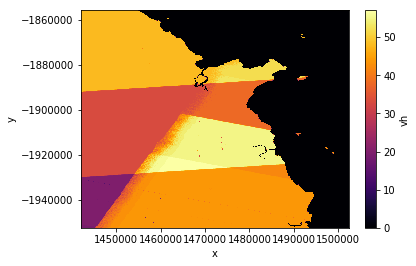

In [7]:
import numpy as np
counts = (z.vh!=z.vh.nodata).sum(dim='time')
counts[::4,::4].plot(cmap='inferno')

# Average signal
A naive mean will fail to account for different numbers of observations in different areas.

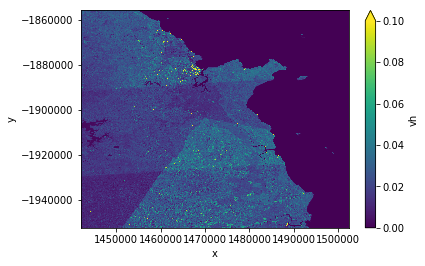

In [8]:
z.vh[:,::4,::4].mean(dim='time').plot(vmax=0.1)

In [62]:
x.vh.nodata

0

/g/data/v10/public/modules/agdc-py3-env/20170525/envs/agdc/lib/python3.6/site-packages/xarray/core/variable.py:1143: RuntimeWarning: invalid value encountered in true_divide
  if not reflexive


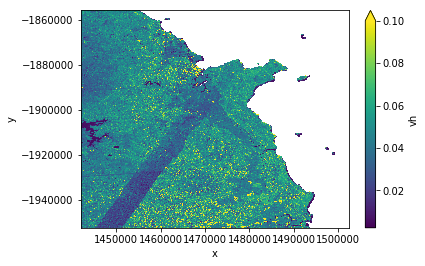

In [9]:
(z.vh[:,::4,::4].sum(dim='time') / counts).plot(vmax=0.1)